# Exercise 02 : Bar

In [271]:
import pandas as pd
import sqlite3

In [ ]:
connection = sqlite3.connect("../../data/checking-logs.sqlite")

## create the graph
- analyze only the users and not the admins
- the fontsize and the figsize are still the same
- night is from 0:00:00 to 03:59:59, morning is from 04:00:00 to 09:59:59, afternoon is from 10:00:00 to 16:59:59, evening is from 17:00:00 to 23:59:59
- choose a palette that you really enjoy, you do not have to replicate it from the graph above

In [273]:
commit_df = pd.io.sql.read_sql("SELECT timestamp as date FROM checker WHERE uid LIKE 'user_%' GROUP BY timestamp", connection)
commit_df['date'] = pd.to_datetime(commit_df['date'])
commit_df.head()

,date
0,2020-04-17 05:19:02.744528
1,2020-04-17 05:22:35.249331
2,2020-04-17 05:22:45.549397
3,2020-04-17 05:34:14.691200
4,2020-04-17 05:34:24.422370


In [274]:
bins = [0, 4, 10, 17, 24]
labels = ['night', 'morning', 'afternoon', 'evening']
commit_df['daytime'] = pd.cut(commit_df['date'].dt.hour, bins=bins, labels=labels, right=False)
commit_df

,date,daytime
0,2020-04-17 05:19:02.744528,morning
1,2020-04-17 05:22:35.249331,morning
2,2020-04-17 05:22:45.549397,morning
3,2020-04-17 05:34:14.691200,morning
4,2020-04-17 05:34:24.422370,morning
...,...,...
3202,2020-05-21 20:19:06.872761,evening
3203,2020-05-21 20:22:41.785725,evening
3204,2020-05-21 20:22:41.877806,evening
3205,2020-05-21 20:37:00.129678,evening


In [275]:
commit_df['date'] = commit_df['date'].dt.date
commit_df['count'] = 0
commit_df

,date,daytime,count
0,2020-04-17,morning,0
1,2020-04-17,morning,0
2,2020-04-17,morning,0
3,2020-04-17,morning,0
4,2020-04-17,morning,0
...,...,...,...
3202,2020-05-21,evening,0
3203,2020-05-21,evening,0
3204,2020-05-21,evening,0
3205,2020-05-21,evening,0


In [276]:
result = commit_df.groupby(['daytime','date'], observed=True)['count'].count().unstack(level=0)
result.fillna(value=0, inplace=True)
result

daytime,night,morning,afternoon,evening
date,,,,
2020-04-17,0.0,13.0,10.0,0.0
2020-04-18,0.0,1.0,33.0,35.0
2020-04-19,2.0,4.0,16.0,11.0
2020-04-20,0.0,0.0,12.0,13.0
2020-04-21,0.0,0.0,0.0,25.0
2020-04-22,0.0,0.0,4.0,24.0
2020-04-23,2.0,6.0,15.0,20.0
2020-04-24,0.0,0.0,4.0,12.0
2020-04-25,1.0,21.0,33.0,49.0


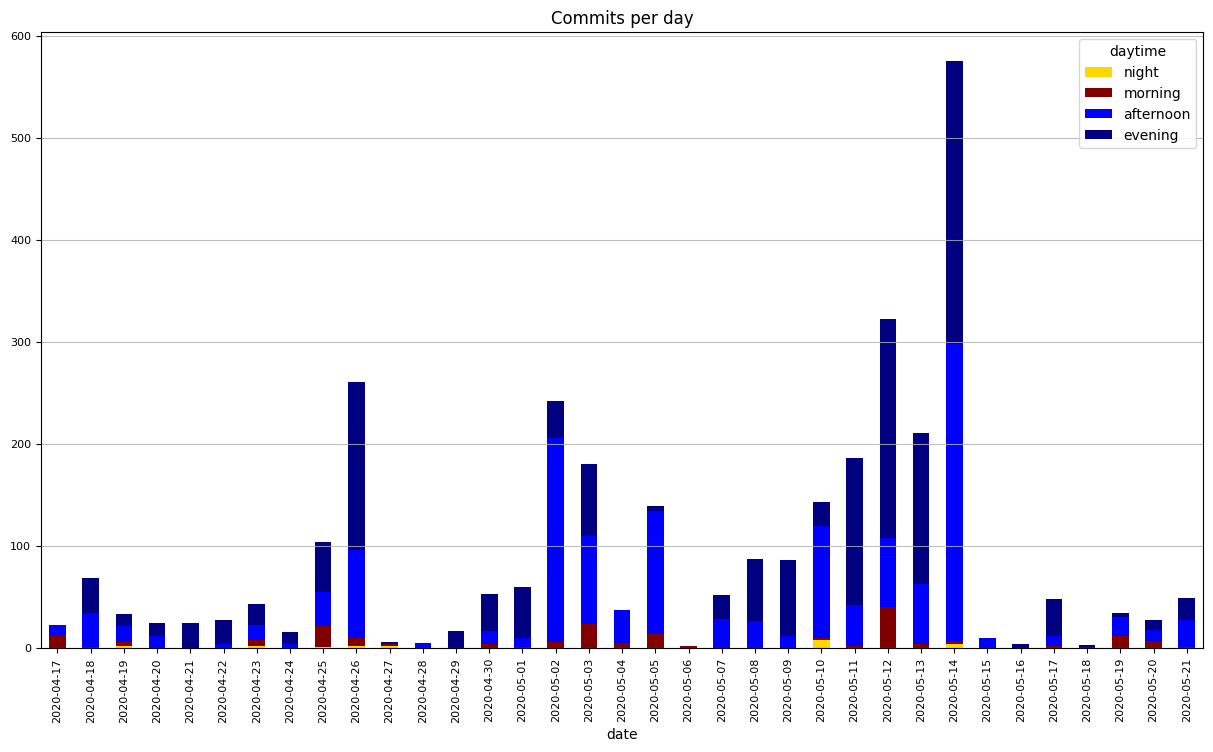

In [277]:
colors = ['gold', 'maroon', 'blue', 'navy']
result.plot(kind='bar', 
            stacked='True', 
            figsize=(15, 8), 
            fontsize=8, 
            title='Commits per day', 
            color=colors
    ).grid(axis='y', which='major', linestyle='solid', alpha=0.8)

## When do our users usually commit the labs: in the night, morning, afternoon, or evening?

In [278]:
result.sum()

daytime
night          21.0
morning       184.0
afternoon    1391.0
evening      1611.0
dtype: float64

## the two most common periods: evening and afternoon.

## Which day has: the most number of commits?

In [279]:
print(result.sum(axis=1).idxmax())

2020-05-14


## Which day has: and at the same time, the number of commits in the evening is higher than in the afternoon?

In [280]:
print(result[result['evening'] > result['afternoon']].sum(axis=1).idxmax())

2020-05-12


In [281]:
connection.close()